In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
q1_path = "data/mr-art_q1_incomplete/fsqc-results.csv"
q2_path = "data/mr-art_q2_incomplete/fsqc-results.csv"
q3_path = "data/mr-art_q3_incomplete/fsqc-results.csv"

In [3]:
q1_df = pd.read_csv(q1_path)
q2_df = pd.read_csv(q2_path)
q3_df = pd.read_csv(q3_path)

q1_df["QA"] = np.repeat([1], (q1_df.shape[0]))
q2_df["QA"] = np.repeat([0], (q2_df.shape[0]))
q3_df["QA"] = np.repeat([-1], (q3_df.shape[0]))

# q1_df["QA"] = np.repeat([1], (q1_df.shape[0]))
# q2_df["QA"] = np.repeat([0], (q2_df.shape[0]))
# q3_df["QA"] = np.repeat([-1], (q3_df.shape[0]))

In [4]:
df = pd.concat([q1_df, q2_df, q3_df])
df["QA"] = df["QA"].astype("category").cat.codes
df.describe()

,wm_snr_orig,gm_snr_orig,wm_snr_norm,gm_snr_norm,cc_size,holes_lh,holes_rh,defects_lh,defects_rh,topo_lh,topo_rh,con_snr_lh,con_snr_rh,rot_tal_x,rot_tal_y,rot_tal_z,QA
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,10.788082,5.925294,17.712197,6.132355,0.003276,25.563953,22.040698,24.755814,24.424419,3.177907,6.859884,3.576299,3.526765,-0.147691,-0.006363,0.036139,0.953488
std,2.114368,1.211236,4.175133,0.268800,0.000672,32.176623,29.985251,22.741330,23.191299,5.574701,21.536952,0.374396,0.345734,0.107170,0.041715,0.046922,0.857127
min,4.626449,2.396850,7.401289,5.616120,0.001988,1.000000,1.000000,4.000000,2.000000,0.400000,0.500000,1.903509,1.802340,-0.499015,-0.100883,-0.079715,0.000000
25%,9.269111,5.091620,14.725922,5.946663,0.002747,8.000000,6.000000,10.000000,8.000000,0.800000,1.300000,3.430334,3.418463,-0.205477,-0.037760,0.002111,0.000000
50%,11.007455,6.197140,18.764566,6.106601,0.003246,14.000000,10.500000,16.500000,15.500000,1.400000,2.000000,3.660686,3.625843,-0.132019,-0.006322,0.036023,1.000000
75%,12.310231,6.856517,21.118706,6.328562,0.003676,29.250000,24.000000,30.000000,31.250000,2.625000,4.200000,3.840195,3.731742,-0.083033,0.019404,0.069343,2.000000
max,15.755179,8.026777,24.973701,7.197556,0.005519,242.000000,188.000000,135.000000,124.000000,39.100000,170.200000,4.158955,4.031086,0.095712,0.101922,0.149947,2.000000


In [5]:
df["QA"].unique()

array([2, 1, 0], dtype=int8)

In [6]:
df.head()

,subject,wm_snr_orig,gm_snr_orig,wm_snr_norm,gm_snr_norm,cc_size,holes_lh,holes_rh,defects_lh,defects_rh,topo_lh,topo_rh,con_snr_lh,con_snr_rh,rot_tal_x,rot_tal_y,rot_tal_z,QA
0,sub-000103_ffs,10.000654,6.019692,19.432695,6.109107,0.003046,11,6,12,14,1.4,3.0,3.660614,3.634103,-0.125505,-0.039750,0.057555,2
1,sub-000148_ffs,14.769779,7.689649,20.325463,6.132823,0.004618,9,9,11,13,0.8,2.0,3.851002,3.755431,-0.094672,-0.054969,-0.019179,2
2,sub-000149_ffs,12.324185,6.921628,23.187858,6.459551,0.004436,5,4,11,9,1.3,1.9,3.835994,3.668603,-0.419358,-0.011683,0.031877,2
3,sub-000159_ffs,11.519914,6.663154,19.410462,6.548151,0.003895,5,6,12,8,1.5,1.6,3.786864,3.625860,-0.189891,-0.030725,-0.014502,2
4,sub-000175_ffs,10.050163,5.915631,21.516876,6.190888,0.002560,9,4,10,14,0.7,1.3,3.956455,3.828863,-0.252640,-0.013951,0.102339,2


## Feature description

variable       |   description
---------------|----------------------------------------------------------------
subject        |   subject ID
wm_snr_orig    |   signal-to-noise ratio for white matter in orig.mgz
gm_snr_orig    |   signal-to-noise ratio for gray matter in orig.mgz
wm_snr_norm    |   signal-to-noise ratio for white matter in norm.mgz
gm_snr_norm    |   signal-to-noise ratio for gray matter in norm.mgz
cc_size        |   relative size of the corpus callosum
lh_holes       |   number of holes in the left hemisphere
rh_holes       |   number of holes in the right hemisphere
lh_defects     |   number of defects in the left hemisphere
rh_defects     |   number of defects in the right hemisphere
topo_lh        |   topological fixing time for the left hemisphere
topo_rh        |   topological fixing time for the right hemisphere
con_lh_snr     |   wm/gm contrast signal-to-noise ratio in the left hemisphere
con_rh_snr     |   wm/gm contrast signal-to-noise ratio in the right hemisphere
rot_tal_x      |   rotation component of the Talairach transform around the x axis
rot_tal_y      |   rotation component of the Talairach transform around the y axis
rot_tal_z      |   rotation component of the Talairach transform around the z axis

## Correlation matrix

/var/folders/87/9hb0405109566_ndd0hyxsp00000gn/T/ipykernel_72014/610497665.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


<Axes: >

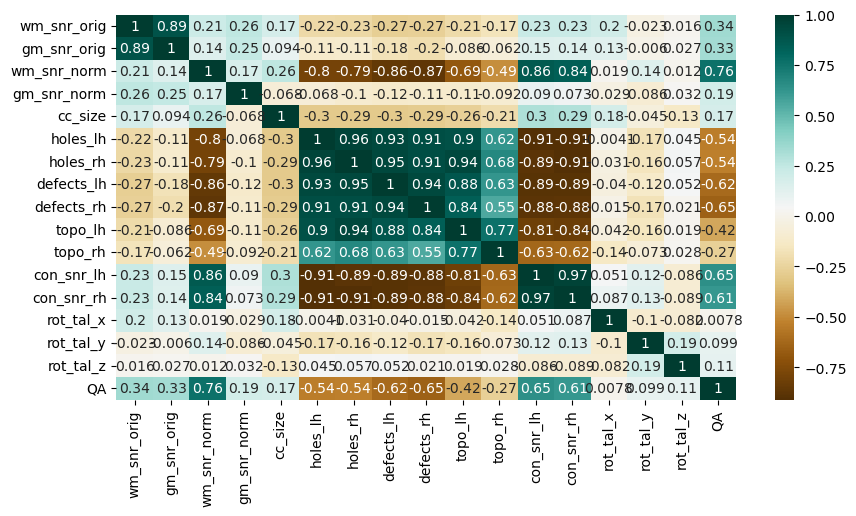

In [7]:
plt.figure(figsize=(10, 5))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
# c

In [8]:
df = df.drop(["wm_snr_orig", "gm_snr_orig", "cc_size", "topo_lh", "topo_rh", "rot_tal_x", "rot_tal_y", "rot_tal_z"], axis=1)

/var/folders/87/9hb0405109566_ndd0hyxsp00000gn/T/ipykernel_72014/610497665.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


<Axes: >

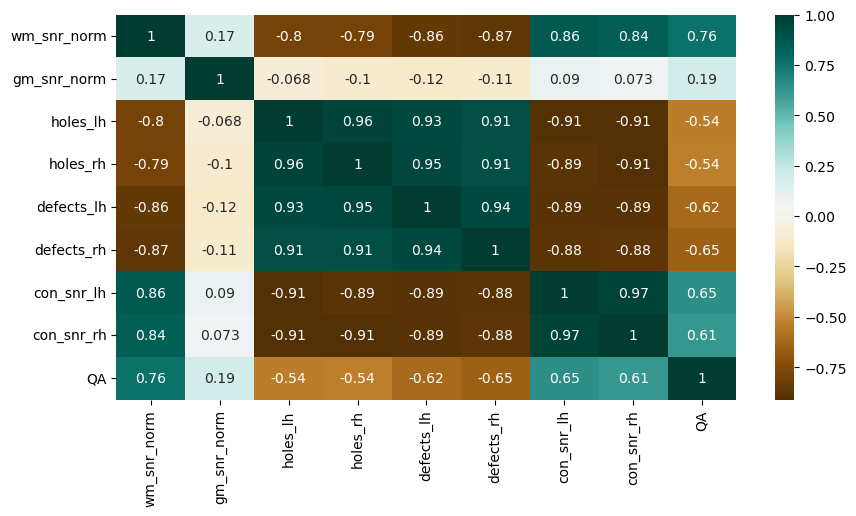

In [9]:
plt.figure(figsize=(10, 5))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
# c

## Additional data cleaning

In [10]:
df["Defects"] = df["defects_lh"] + df["defects_rh"]
df["CON_SNR"] = df["con_snr_lh"] + df["con_snr_rh"]

df = df.drop(
    ["gm_snr_norm", "holes_lh", "holes_rh", "con_snr_lh", "con_snr_rh"], axis=1
)

df = df[["subject", "Defects", "CON_SNR", "wm_snr_norm", "QA"]]

/var/folders/87/9hb0405109566_ndd0hyxsp00000gn/T/ipykernel_72014/610497665.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = df.corr()


<Axes: >

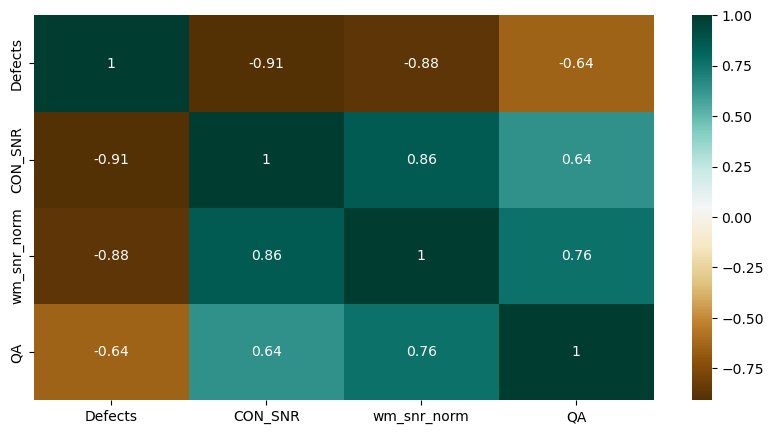

In [11]:
plt.figure(figsize=(10, 5))
c = df.corr()
sns.heatmap(c, cmap="BrBG", annot=True)
# c

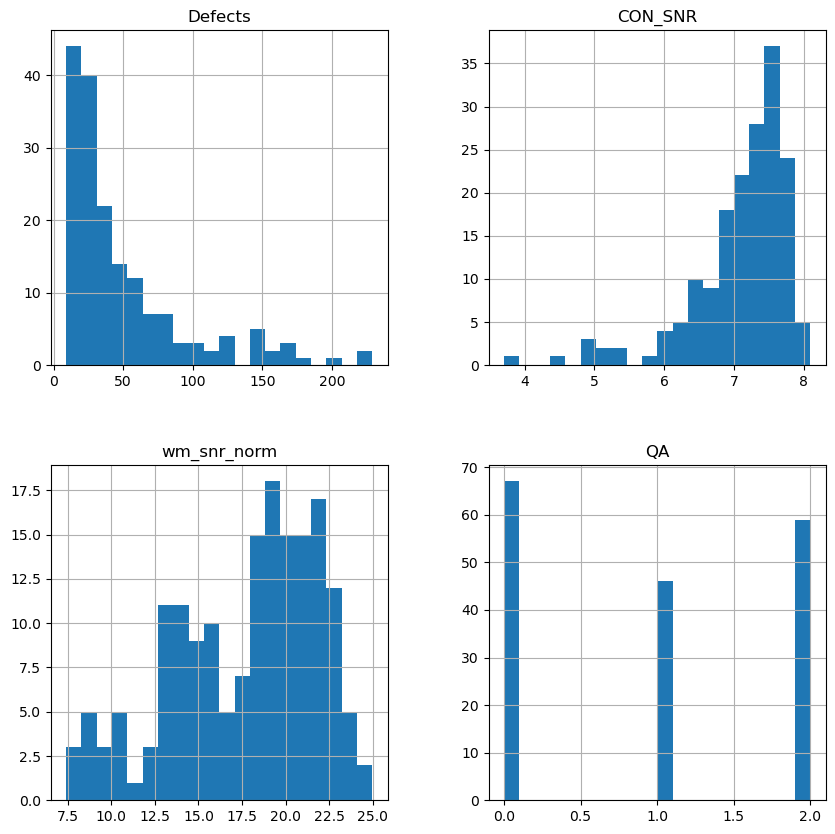

In [12]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = df.drop(["subject", "QA"], axis=1), df["QA"]

X = StandardScaler().fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scaler = StandardScaler().fit(X_train, y_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [14]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier

# Don't have to set `multi_class` argument if used with OVOClassifier
ovo = OneVsOneClassifier(estimator=GaussianProcessClassifier())

ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=GaussianProcessClassifier())

In [15]:
from sklearn.metrics import accuracy_score

y_pred = ovo.predict(X_test)
score = accuracy_score(y_pred=y_pred, y_true=y_test)
score

0.7142857142857143

<Axes: >

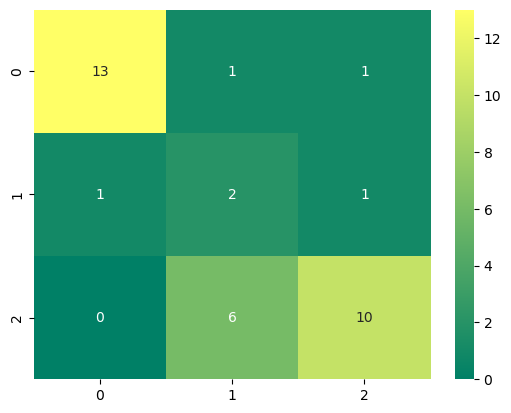

In [16]:
from sklearn.metrics import confusion_matrix  # for confusion matrix

sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap="summer")

The overall score for Decision Tree classifier is: 62.06


<Axes: >

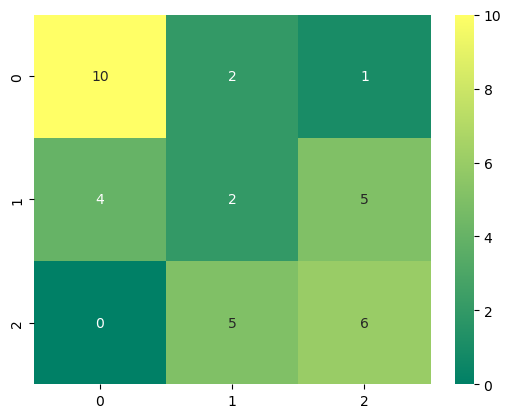

In [17]:
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    criterion="gini", min_samples_split=10, min_samples_leaf=1, max_depth=20
)
model.fit(X_train, y_train)
dt_pred = model.predict(X_test)
kfold = KFold(n_splits=10)  # k=10, split the data into 10 equal parts
result_tree = cross_val_score(model, X, y, cv=10, scoring="accuracy")
print(
    "The overall score for Decision Tree classifier is:",
    round(result_tree.mean() * 100, 2),
)
y_pred = cross_val_predict(model, X, y, cv=10)
sns.heatmap(confusion_matrix(dt_pred, y_test), annot=True, cmap="summer")

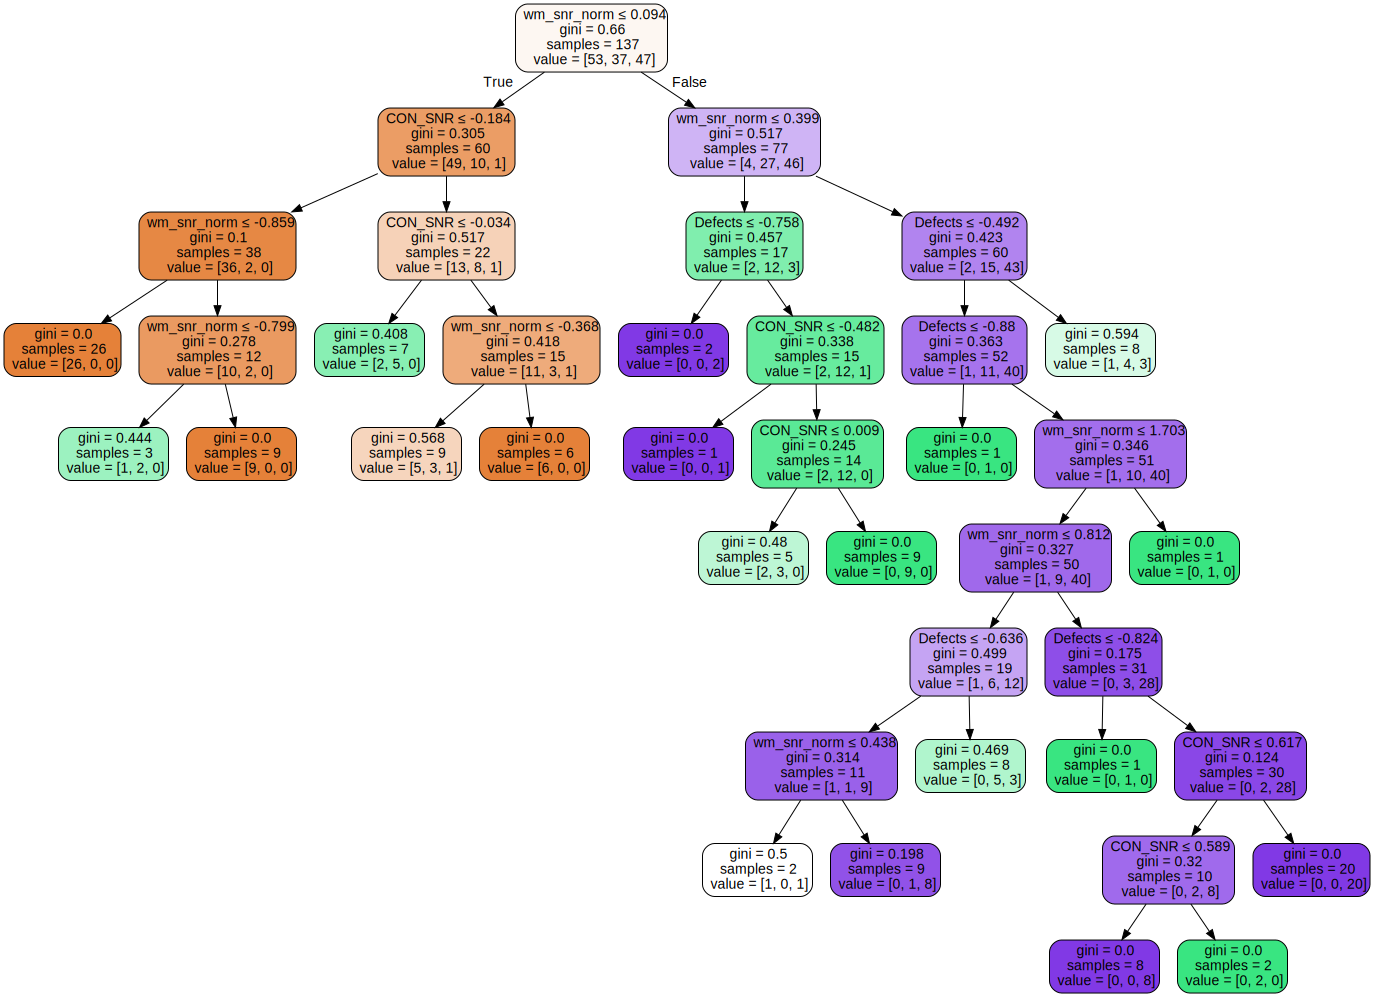

In [18]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=df.columns[1:-1],
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dot_data)
graph